This notebook is for merging qualtrics data with 
1) the number of page views per page, and 
2) the duration of page view per page, that was cleaned and processed by Prof Leslie Synder to GA data.

In [1]:
import pandas as pd # Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python
import json # JSON encoder and decoder for Python
import re
from functools import reduce
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
import operator
import datetime
import seaborn as sns
file_loc = "C:/Users/huixin/Dropbox/research/menoplan/beta_phase/cleaned_analysis/"

In [28]:
qualtrics_data = pd.read_csv("C:/Users/huixin/Dropbox/research/menoplan/beta_phase/qualtrics_data/qualtrics_02nov.csv")

In [29]:
len(list(qualtrics_data.columns)) #col length is 226

226

In [31]:
ga_data = pd.read_csv("C:/Users/huixin/Dropbox/research/menoplan/beta_phase/ga_data/20oct_page_visited.csv")
ga_data = ga_data.rename(columns={'IP Address': 'IPAddress', 'Avg. Time on Page': 'muTimeOnPage'})
ga_data.loc[ga_data['Page'] == '/', 'Page'] = 'homepage' #find rows that == '/', change / to homepage
ga_data['Page'] = ga_data['Page'].str.strip("/") #remove /from all beginning and end of string
ga_data = ga_data.drop(columns="Page Value") #drop this col

In [32]:
ga_data['muTimeOnPage'] = ga_data['muTimeOnPage'].apply(pd.to_datetime, format='%H:%M:%S').apply(datetime.datetime.time)
ga_data['muTimeOnPage'] = ga_data['muTimeOnPage'].apply(lambda x: x.second + x.minute*60 + x.hour*3600)

In [33]:
ga_data

,Page,IPAddress,Pageviews,Unique Pageviews,muTimeOnPage,Entrances,Bounce Rate,% Exit
0,symptoms-landing-page,73.131.117.35,10,1,14,0.0,0.00%,0.00%
1,symptoms-landing-page,73.147.52.48,10,1,44,0.0,0.00%,0.00%
2,symptoms-landing-page,75.58.42.195,10,1,10,0.0,0.00%,0.00%
3,homepage,172.56.30.114,9,4,285,4.0,50.00%,33.33%
4,treatments,71.214.48.85,9,1,11,0.0,0.00%,0.00%
...,...,...,...,...,...,...,...,...
2551,10/17/2021,92,NaN,NaN,0,NaN,NaN,NaN
2552,10/18/2021,42,NaN,NaN,0,NaN,NaN,NaN
2553,10/19/2021,6,NaN,NaN,0,NaN,NaN,NaN
2554,10/20/2021,79,NaN,NaN,0,NaN,NaN,NaN


In [34]:
viewsPerPageById = ga_data.groupby(['IPAddress', 'Page'], as_index=False).agg({'Pageviews':'mean'})
viewsPerPageById.columns = viewsPerPageById.columns.str.strip('/?=')
viewsPerPageById= viewsPerPageById.rename(columns={"": "homepage"})
viewsPerPageById = viewsPerPageById.groupby(['IPAddress', 'Page'])['Pageviews'].agg("mean").unstack(level=1)
ls = list(viewsPerPageById.columns)
#ls

In [35]:
totalDurPerPageById = ga_data.groupby(['IPAddress', 'Page'], as_index=False).agg({'muTimeOnPage':'mean'})
totalDurPerPageById.columns = totalDurPerPageById.columns.str.strip('/?=')
totalDurPerPageById= totalDurPerPageById.rename(columns={"": "homepage"})
totalDurPerPageById = totalDurPerPageById.groupby(['IPAddress', 'Page'])['muTimeOnPage'].agg("mean").unstack(level=1)
ls = list(totalDurPerPageById.columns)

In [36]:
r = re.compile('\d*([.,\/]?\d+)')# use regex to find dates
newlist = list(filter(r.match, ls)) # create list of dates 
totalDurPerPageById = totalDurPerPageById.drop(columns=newlist) #we do not want the dates

In [37]:
r = re.compile('\d*([.,\/]?\d+)')# use regex to find dates
newlist = list(filter(r.match, ls)) # create list of dates 
viewsPerPageById = viewsPerPageById.drop(columns=newlist) #we do not want the dates

In [38]:
f.add_suffix('_col')

Page,?ae_live_scanner=true,?fbclid=IwAR0M3bRPnJYBWlyH5-BamVdmhTWKAX1t2rzW5XDEq85y8_j9K2CuqmPoJb0,?fbclid=IwAR0k6mT0tgAAm41TcLlmglPwprfpZQQ1O3I8yy3G6H0qqIFZYHrhY9-aikw,?fbclid=IwAR0l1Rje0xw5cqFL5ElkqzGt9ts407CqVKuEtYqMNtSeSxgFPl0tejHKysA,?fbclid=IwAR0q6ZEANDvP7QfywqPRk0qK099s9-0W6IUqa0JYB0__YhkYKBWbS2L68yI,?fbclid=IwAR1C6WyMm3zAd2-DZ1oR23-vbMrIZXHbDJyVR7Qiye-lfNiQxkbXJCcPA4w,?fbclid=IwAR1KHlxeKoV4kJJW407BUJLqXqNhfmnWFepPsg73PHJjmce8-eyCCID8PJQ,?fbclid=IwAR1yZbqx89vCK-hlEWy4WFhPhO5bs4oKQ3IDWCj77QsUNPG6V0oe9306zYk,?fbclid=IwAR2Qmk31-ogqnskL5iHFxK4v0b_YJTlpFUZNzeYYsx95ux3-a90UwhkfcmA,?fbclid=IwAR3YdliFNPwA2tcHWu540noMpbhCSI3P4HGf2-MRUld-hQLc55tZmDXUU4s,...,weight-gain/?ae_live_scanner=true,what-if-i-have-breast-cancer,what-if-i-have-breast-cancer/?ae_live_scanner=true,what-if-im-transgender-or-nonbinary,what-if-im-transgender-or-nonbinary/?ae_live_scanner=true,who-we-are,who-we-are/?ae_live_scanner=true,womens-stories,womens-stories/?ae_live_scanner=true,yoga
IPAddress,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.127.30.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100.1.197.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100.1.210.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.82.254.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.89.44.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.92.172.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
insomnia_cols = [col for col in viewsPerPageById.columns if 'test/insomnia-severity-index' in col and len(col) >28]
anxiety_cols = [col for col in viewsPerPageById.columns if 'test/anxiety-assessment' in col and len(col) >23]
depression_cols = [col for col in viewsPerPageById.columns if 'test/depression-assessment' in col and len(col) >26]

In [40]:
totalDurPerPageById['insomnia-severity-index-results'] = totalDurPerPageById[insomnia_cols].sum(axis=1)
totalDurPerPageById['anxiety-assessment-results'] = totalDurPerPageById[anxiety_cols].sum(axis=1)
totalDurPerPageById['depression-assessment-results'] = totalDurPerPageById[depression_cols].sum(axis=1)

In [41]:
viewsPerPageById['insomnia-severity-index-results'] = viewsPerPageById[insomnia_cols].sum(axis=1)
viewsPerPageById['anxiety-assessment-results'] = viewsPerPageById[anxiety_cols].sum(axis=1)
viewsPerPageById['depression-assessment-results'] = viewsPerPageById[depression_cols].sum(axis=1)

In [42]:
totalDurPerPageById = totalDurPerPageById.drop(columns=insomnia_cols)
totalDurPerPageById = totalDurPerPageById.drop(columns=anxiety_cols)
totalDurPerPageById = totalDurPerPageById.drop(columns=depression_cols)

In [43]:
viewsPerPageById = viewsPerPageById.drop(columns=insomnia_cols)
viewsPerPageById = viewsPerPageById.drop(columns=anxiety_cols)
viewsPerPageById = viewsPerPageById.drop(columns=depression_cols)

In [44]:
totalDurPerPageById = totalDurPerPageById.iloc[:,10:]

In [49]:
totalDurPerPageById

Page,?s=Anxiety,?s=Transgender,?s=am+i+in+menopause,Day Index,about,about/?ae_live_scanner=true,acupuncture,am-i-in-menopause,am-i-in-menopause/?ae_live_scanner=true,avoiding-triggers,...,what-if-im-transgender-or-nonbinary,what-if-im-transgender-or-nonbinary/?ae_live_scanner=true,who-we-are,who-we-are/?ae_live_scanner=true,womens-stories,womens-stories/?ae_live_scanner=true,yoga,insomnia-severity-index-results,anxiety-assessment-results,depression-assessment-results
IPAddress,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1.127.30.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
100.1.197.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
100.1.210.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.82.254.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99.89.44.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99.92.172.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [50]:
merged_totalDurPerPageById = pd.merge(totalDurPerPageById, qualtrics_data, on='IPAddress')

In [51]:
merged_totalDurPerPageById

,IPAddress,?s=Anxiety,?s=Transgender,?s=am+i+in+menopause,Day Index,about,about/?ae_live_scanner=true,acupuncture,am-i-in-menopause,am-i-in-menopause/?ae_live_scanner=true,...,ToolsHotFlash,ToolsLeaks,ToolsCreateMP,ToolsAmInMP,ToolsNone,numtoolsx,alltools,learnedx,DecideLearnx,DecisionLearnedx
0,100.1.197.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,...,1,0,0,1,0,5.0,,4.33333333333333,4.4,4.5
1,100.1.210.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1.0,,3.66666666666667,3.6,3.5
2,104.4.139.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,NaN,...,0,0,1,1,0,2.0,,5,5,5
3,104.7.29.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,2.0,,3.66666666666667,3.8,3.75
4,107.10.231.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,...,0,0,0,0,1,1.0,,3.33333333333333,3.2,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,99.185.57.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,1.0,,3.66666666666667,3.2,3
222,99.196.242.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1.0,,4,4,4
223,99.32.58.89,NaN,NaN,NaN,NaN,15.0,NaN,NaN,54.0,NaN,...,0,0,0,0,1,1.0,,1.66666666666667,1.6,1.25
224,99.44.25.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,1.0,,5,4.2,4


In [52]:
allNACols = list(merged_totalDurPerPageById.columns[merged_totalDurPerPageById.isnull().all(0)] )
dropae_live_scanner_urls = [col for col in allNACols if '/?ae_live_scanner=true' in col]
merged_totalDurPerPageById = merged_totalDurPerPageById.drop(columns=dropae_live_scanner_urls)

In [53]:
viewsPerPageById = viewsPerPageById.iloc[:,10:]
viewsPerPageById

Page,?s=Anxiety,?s=Transgender,?s=am+i+in+menopause,Day Index,about,about/?ae_live_scanner=true,acupuncture,am-i-in-menopause,am-i-in-menopause/?ae_live_scanner=true,avoiding-triggers,...,what-if-im-transgender-or-nonbinary,what-if-im-transgender-or-nonbinary/?ae_live_scanner=true,who-we-are,who-we-are/?ae_live_scanner=true,womens-stories,womens-stories/?ae_live_scanner=true,yoga,insomnia-severity-index-results,anxiety-assessment-results,depression-assessment-results
IPAddress,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1.127.30.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
100.1.197.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
100.1.210.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.82.254.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99.89.44.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99.92.172.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [54]:
len(list(viewsPerPageById)) #how many cols? 107
merged_df = pd.merge(viewsPerPageById, qualtrics_data, on='IPAddress')

In [55]:
allNACols = list(merged_df.columns[merged_df.isnull().all(0)] )
print(allNACols)
dropae_live_scanner_urls = [col for col in allNACols if '/?ae_live_scanner=true' in col]
merged_df = merged_df.drop(columns=dropae_live_scanner_urls)

['?s=am+i+in+menopause', 'Day Index', 'about/?ae_live_scanner=true', 'am-i-in-menopause/?ae_live_scanner=true', 'bladder-control-problems/?ae_live_scanner=true', 'brain-fog-cognitive-issues/?ae_live_scanner=true', 'contact', 'create-my-menoplan/?ae_live_scanner=true', 'create-my-menoplan/?fbclid=IwAR2CbqesKC3coyg2jLTi-g5SedQG0lhOJfRsSdU3be_7mNpys3W1Aem6u6A', 'dry-eyes/?ae_live_scanner=true', 'dry-hair-skin/?ae_live_scanner=true', 'heavy-irregular-periods/?ae_live_scanner=true', 'hot-flashes/?ae_live_scanner=true', 'low-sex-drive/?ae_live_scanner=true', 'mood-depression-anxiety/?ae_live_scanner=true', 'our-story/?ae_live_scanner=true', 'our-team/?ae_live_scanner=true', 'pain-with-sex/?ae_live_scanner=true', 'physical-aches-pains/?ae_live_scanner=true', 'questions-and-answers/?ae_live_scanner=true', 'quit-smoking-tobacco', 'sleep-problems-insomnia/?ae_live_scanner=true', 'staying-healthy-in-midlife/?ae_live_scanner=true', 'strategies-to-talk-with-your-doctor/?ae_live_scanner=true', 'symp

In [56]:
merged_df = merged_df.fillna(0)
#merged_df

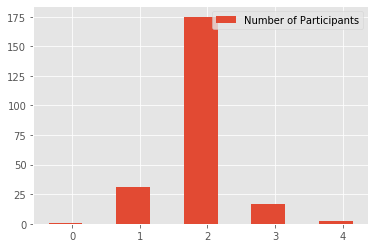

In [25]:
freqOfSurveyAttempt = merged_df.pivot_table(columns=['N_QUALTRICS'], aggfunc='size')#aggregates values by counting the freqs
plt.style.use('ggplot') #

X = ['0','1','2','3', '4'] #X lables
X_axis = np.arange(len(X)) #create an array with len of 5
plt.bar(X_axis - 0.1, freqOfSurveyAttempt, 0.5, label = 'Number of Participants')#create first bar
#plt.bar(X_axis + 0.2, (freqOfSurveyAttempt/[1,2,3,4,5]), 0.4, label = 'Unique IPs')#create second bar
plt.xticks(X_axis, X)
#plt.xlabel("N times user submit survey response")
plt.legend()

In [57]:
merged_totalDurPerPageById.shape == merged_df.shape

True

In [23]:
merged_df.to_csv(file_loc + "merged_pageCount_02nov.csv")

In [27]:
merged_totalDurPerPageById.to_csv(file_loc + "merged_pageDuration_02nov.csv")